In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import signatory
import base
import neural_inverse
from importlib import reload
import time as timing

## Learn the inverse of log-signature (pytorch)

step:  0 loss:  1.4393459782004356
step:  100 loss:  0.020990368793718517
step:  200 loss:  0.008956610719906166
step:  300 loss:  0.006355223595164716
step:  400 loss:  0.00931552960537374
step:  500 loss:  0.00598296380485408
step:  600 loss:  0.006324684043647721
step:  700 loss:  0.003931146791728679
step:  800 loss:  0.0032678911520633847
step:  900 loss:  0.005008173597161658
Finished Training
LOSS is:  0.00029772543


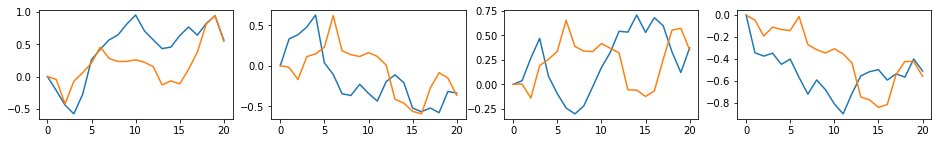

Duration: 415.61224913597107


In [2]:
reload(neural_inverse)
N = 20
batch = 1000
order = 5
path = neural_inverse.generate_bmpath(batch, N)
start_time = timing.time()
y_recover, logsig_recover, net = neural_inverse.inverse_multiple_path(path, order)
end_time = timing.time()
print("Duration: {}".format(end_time - start_time))

## Reverse a single path

In [3]:
import time as timing
N = 20
sigma = 1
pathBM = neural_inverse.generate_bmpath(1, N)
time = np.linspace(0,1,N+1)
path0 = np.exp(sigma * pathBM - 0.5*sigma**2*time[None,:,None])
logsig0 = signatory.logsignature(neural_inverse.leadlag(torch.tensor(path0)[:,:,0]), order)

start_time = timing.time()
net0, y_recover0, logsig_recover0 = neural_inverse.inverse_single_path(path0, order)
end_time = timing.time()
print("Duration: {}".format(end_time - start_time))

step:  0 loss:  1.6666487455368042
step:  100 loss:  0.0008529043989256024
step:  200 loss:  0.00041784276254475117
step:  300 loss:  0.00039233226561918855
step:  400 loss:  0.0003652001323644072
step:  500 loss:  0.00033827064908109605
step:  600 loss:  0.0003113222774118185
step:  700 loss:  0.0002851234457921237
step:  800 loss:  0.00026143822469748557
step:  900 loss:  0.00024105224292725325
Finished Training
LOSS is:  0.00022269614
Duration: 16.411879062652588


## Compare with evolution algorithm
comparison is conducted on two aspects
1. recovered path 
2. hedging performance with the recovered path

In [4]:
import base
import logsig_inversion
pip = 0.01
n_pips = 10
n_points = N+1
order = 5
n_iterations = 100
n_organisms = 1000

start_time = timing.time()
y_recover1, loss = logsig_inversion.train(logsig0.numpy()[0], order, n_iterations, n_organisms, n_points, pip, n_pips)
y_recover1 = y_recover1 + path0[0,0,0]
end_time = timing.time()
print("Duration: {}".format(end_time - start_time))


Duration: 98.4005343914032


In [ ]:
import hedge
reload(hedge)
K = 1
V_recover0, V_recover1 = hedge.delta_comapre(K,sigma,time,path0,y_recover0,y_recover1)

logsig_recover1 = signatory.logsignature(neural_inverse.leadlag(torch.tensor(y_recover1)[None,:]), order)
XX = torch.tensor(X0, dtype = torch.float)
print('True log signature: \n', XX[0])
print('Neural log signature: \n', logsig_recover0[0])
print('Evolution log signature: \n', logsig_recover1[0])